https://www.kaggle.com/datasets/muhammadbinimran/housing-price-prediction-data/data?select=housing_price_dataset.csv

# Uploading a data. Create a dataframe. Data analysis

https://drive.google.com/file/d/1ufd6vnGdu_nARv3Xn2i4Fg5sZK7vMrZ5/view?usp=sharing

In [ ]:
! gdown 1ufd6vnGdu_nARv3Xn2i4Fg5sZK7vMrZ5

Downloading...
From: https://drive.google.com/uc?id=1ufd6vnGdu_nARv3Xn2i4Fg5sZK7vMrZ5
To: /content/housing_price_dataset.csv
100% 1.94M/1.94M [00:00<00:00, 152MB/s]


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import (r2_score, mean_absolute_error,
                             mean_absolute_percentage_error, mean_squared_error)

In [ ]:
df = pd.read_csv('/content/housing_price_dataset.csv')
df

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,Rural,1969,215355.283618
1,2459,3,2,Rural,1980,195014.221626
2,1860,2,1,Suburb,1970,306891.012076
3,2294,2,1,Urban,1996,206786.787153
4,2130,5,2,Suburb,2001,272436.239065
...,...,...,...,...,...,...
49995,1282,5,3,Rural,1975,100080.865895
49996,2854,2,2,Suburb,1988,374507.656727
49997,2979,5,3,Suburb,1962,384110.555590
49998,2596,5,2,Rural,1984,380512.685957


In [ ]:
df.describe()

,SquareFeet,Bedrooms,Bathrooms,YearBuilt,Price
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,2006.374680,3.498700,1.995420,1985.404420,224827.325151
std,575.513241,1.116326,0.815851,20.719377,76141.842966
min,1000.000000,2.000000,1.000000,1950.000000,-36588.165397
25%,1513.000000,3.000000,1.000000,1967.000000,169955.860225
50%,2007.000000,3.000000,2.000000,1985.000000,225052.141166
75%,2506.000000,4.000000,3.000000,2003.000000,279373.630052
max,2999.000000,5.000000,3.000000,2021.000000,492195.259972


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SquareFeet    50000 non-null  int64  
 1   Bedrooms      50000 non-null  int64  
 2   Bathrooms     50000 non-null  int64  
 3   Neighborhood  50000 non-null  object 
 4   YearBuilt     50000 non-null  int64  
 5   Price         50000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 2.3+ MB


In [ ]:
df.isna().mean()

SquareFeet      0.0
Bedrooms        0.0
Bathrooms       0.0
Neighborhood    0.0
YearBuilt       0.0
Price           0.0
dtype: float64

In [ ]:
df.corr()

<ipython-input-7-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,SquareFeet,Bedrooms,Bathrooms,YearBuilt,Price
SquareFeet,1.000000,-0.002638,-0.003275,0.000482,0.750720
Bedrooms,-0.002638,1.000000,0.007405,0.003147,0.072624
Bathrooms,-0.003275,0.007405,1.000000,0.003748,0.028418
YearBuilt,0.000482,0.003147,0.003748,1.000000,-0.002288
Price,0.750720,0.072624,0.028418,-0.002288,1.000000


In [ ]:
df.Neighborhood.value_counts()

Suburb    16721
Rural     16676
Urban     16603
Name: Neighborhood, dtype: int64

In [ ]:
df.groupby('Neighborhood')['Price'].agg(['count', 'mean'])

# средняя цена почти одинакова для различных месторасположений домов

,count,mean
Neighborhood,,
Rural,16676,224096.126040
Suburb,16721,223234.189857
Urban,16603,227166.197139


<Axes: >

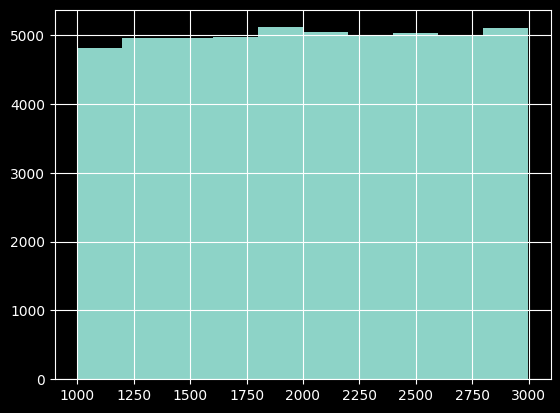

In [ ]:
df['SquareFeet'].hist()

In [ ]:
df['SquareFeet_group'] = pd.cut(df['SquareFeet'],
 [-float('inf'), 1500, 2000, 2500, float('inf')])
df.groupby('SquareFeet_group')['Price'].agg(['count', 'mean'])

,count,mean
SquareFeet_group,,
"(-inf, 1500.0]",12192,149780.264139
"(1500.0, 2000.0]",12637,199451.440189
"(2000.0, 2500.0]",12549,248819.193430
"(2500.0, inf]",12622,298870.651968


<Axes: xlabel='SquareFeet_group'>

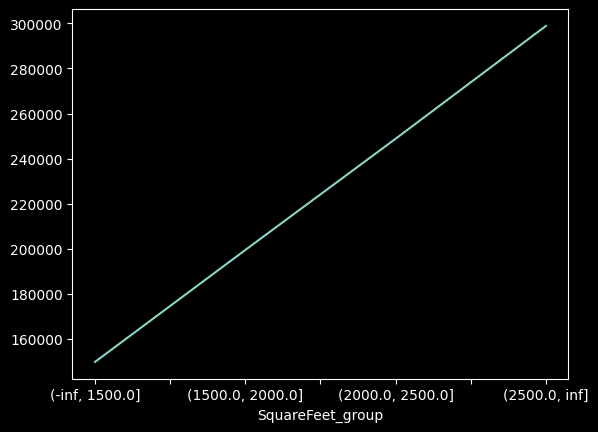

In [ ]:
df.groupby('SquareFeet_group')['Price'].mean().plot()
# c ростом площади цена дома увеличивается

In [ ]:
df.groupby('Bedrooms')['Price'].agg(['count', 'mean'])

,count,mean
Bedrooms,,
2,12436,218230.991729
3,12661,221057.880496
4,12435,227473.373262
5,12468,232595.478259


<Axes: xlabel='Bedrooms'>

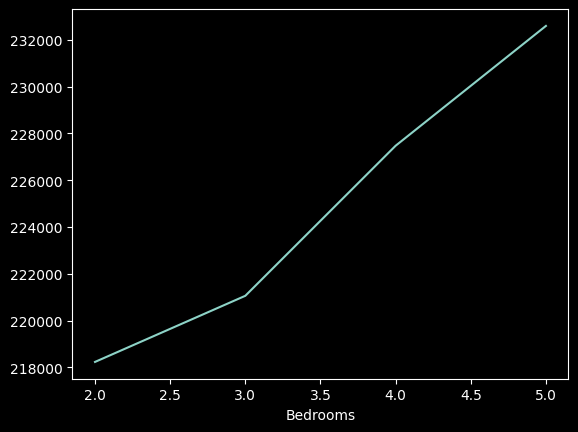

In [ ]:
df.groupby('Bedrooms')['Price'].mean().plot()
# c ростом количества спален цена дома увеличивается

<Axes: xlabel='Bathrooms'>

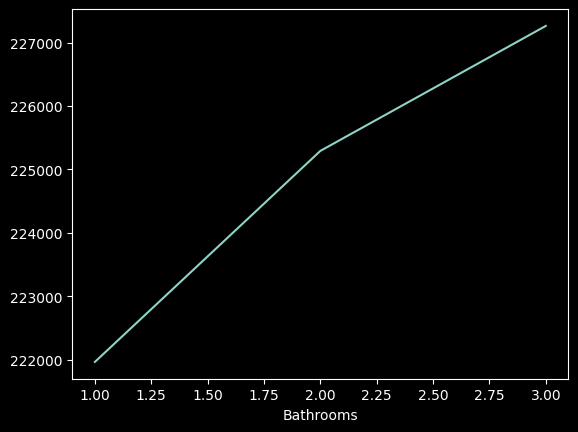

In [ ]:
df.groupby('Bathrooms')['Price'].mean().plot()
# c увеличением количества ванных комнат цена дома увеличивается

In [ ]:
df['Price_group'] = pd.cut(df['Price'],
 [-float('inf'), 0, 100000, 200000, float('inf')])
df.groupby('Price_group')['Price'].agg(['count', 'mean'])

# 22 объекта имеют отрицательную стоимость,что по определению не может быть

,count,mean
Price_group,,
"(-inf, 0.0]",22,-12211.078852
"(0.0, 100000.0]",2516,74909.056451
"(100000.0, 200000.0]",16508,158293.335454
"(200000.0, inf]",30954,272664.512941


In [ ]:
df[df['Price'] <= 0]

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price,SquareFeet_group,Price_group
1266,1024,2,2,Urban,2006,-24715.242482,"(-inf, 1500.0]","(-inf, 0.0]"
2310,1036,4,1,Suburb,1983,-7550.504574,"(-inf, 1500.0]","(-inf, 0.0]"
3630,1235,3,2,Rural,2012,-19871.251146,"(-inf, 1500.0]","(-inf, 0.0]"
4162,1352,5,2,Suburb,1977,-10608.359522,"(-inf, 1500.0]","(-inf, 0.0]"
5118,1140,4,1,Urban,2020,-23911.003119,"(-inf, 1500.0]","(-inf, 0.0]"
5951,1097,4,3,Rural,1981,-4537.418615,"(-inf, 1500.0]","(-inf, 0.0]"
6355,1016,5,2,Rural,1997,-13803.684059,"(-inf, 1500.0]","(-inf, 0.0]"
8720,1235,3,1,Urban,1952,-24183.000515,"(-inf, 1500.0]","(-inf, 0.0]"
9611,1131,3,3,Urban,1959,-13692.026068,"(-inf, 1500.0]","(-inf, 0.0]"
10597,1177,2,3,Urban,2010,-434.097124,"(-inf, 1500.0]","(-inf, 0.0]"


In [ ]:
df['Price'] = df['Price'].abs()
df.drop(['SquareFeet_group', 'Price_group'], axis=1, inplace=True)
df

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,Rural,1969,215355.283618
1,2459,3,2,Rural,1980,195014.221626
2,1860,2,1,Suburb,1970,306891.012076
3,2294,2,1,Urban,1996,206786.787153
4,2130,5,2,Suburb,2001,272436.239065
...,...,...,...,...,...,...
49995,1282,5,3,Rural,1975,100080.865895
49996,2854,2,2,Suburb,1988,374507.656727
49997,2979,5,3,Suburb,1962,384110.555590
49998,2596,5,2,Rural,1984,380512.685957


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SquareFeet    50000 non-null  int64  
 1   Bedrooms      50000 non-null  int64  
 2   Bathrooms     50000 non-null  int64  
 3   Neighborhood  50000 non-null  object 
 4   YearBuilt     50000 non-null  int64  
 5   Price         50000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 2.3+ MB


In [ ]:
df.describe()

,SquareFeet,Bedrooms,Bathrooms,YearBuilt,Price
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,2006.374680,3.498700,1.995420,1985.404420,224838.070900
std,575.513241,1.116326,0.815851,20.719377,76110.105518
min,1000.000000,2.000000,1.000000,1950.000000,154.779120
25%,1513.000000,3.000000,1.000000,1967.000000,169955.860225
50%,2007.000000,3.000000,2.000000,1985.000000,225052.141166
75%,2506.000000,4.000000,3.000000,2003.000000,279373.630052
max,2999.000000,5.000000,3.000000,2021.000000,492195.259972


# Create a copy of the dataframe. Transform a categorical data. Data normalization

In [ ]:
df_copy1 = df.copy()

In [ ]:
df_copy1 = pd.get_dummies(df_copy1, columns=['Neighborhood'])
df_copy1

,SquareFeet,Bedrooms,Bathrooms,YearBuilt,Price,Neighborhood_Rural,Neighborhood_Suburb,Neighborhood_Urban
0,2126,4,1,1969,215355.283618,1,0,0
1,2459,3,2,1980,195014.221626,1,0,0
2,1860,2,1,1970,306891.012076,0,1,0
3,2294,2,1,1996,206786.787153,0,0,1
4,2130,5,2,2001,272436.239065,0,1,0
...,...,...,...,...,...,...,...,...
49995,1282,5,3,1975,100080.865895,1,0,0
49996,2854,2,2,1988,374507.656727,0,1,0
49997,2979,5,3,1962,384110.555590,0,1,0
49998,2596,5,2,1984,380512.685957,1,0,0


In [ ]:
from sklearn.preprocessing import MinMaxScaler

columns_to_normalize = ['SquareFeet', 'Bedrooms', 'Bathrooms', 'YearBuilt']
scaler = MinMaxScaler()

df_copy1[columns_to_normalize] = scaler.fit_transform(
    df_copy1[columns_to_normalize])
df_copy1

,SquareFeet,Bedrooms,Bathrooms,YearBuilt,Price,Neighborhood_Rural,Neighborhood_Suburb,Neighborhood_Urban
0,0.563282,0.666667,0.0,0.267606,215355.283618,1,0,0
1,0.729865,0.333333,0.5,0.422535,195014.221626,1,0,0
2,0.430215,0.000000,0.0,0.281690,306891.012076,0,1,0
3,0.647324,0.000000,0.0,0.647887,206786.787153,0,0,1
4,0.565283,1.000000,0.5,0.718310,272436.239065,0,1,0
...,...,...,...,...,...,...,...,...
49995,0.141071,1.000000,1.0,0.352113,100080.865895,1,0,0
49996,0.927464,0.000000,0.5,0.535211,374507.656727,0,1,0
49997,0.989995,1.000000,1.0,0.169014,384110.555590,0,1,0
49998,0.798399,1.000000,0.5,0.478873,380512.685957,1,0,0


In [ ]:
df_copy1.isna().mean()

SquareFeet             0.0
Bedrooms               0.0
Bathrooms              0.0
YearBuilt              0.0
Price                  0.0
Neighborhood_Rural     0.0
Neighborhood_Suburb    0.0
Neighborhood_Urban     0.0
dtype: float64

In [ ]:
df_copy1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   SquareFeet           50000 non-null  float64
 1   Bedrooms             50000 non-null  float64
 2   Bathrooms            50000 non-null  float64
 3   YearBuilt            50000 non-null  float64
 4   Price                50000 non-null  float64
 5   Neighborhood_Rural   50000 non-null  uint8  
 6   Neighborhood_Suburb  50000 non-null  uint8  
 7   Neighborhood_Urban   50000 non-null  uint8  
dtypes: float64(5), uint8(3)
memory usage: 2.1 MB


In [ ]:
df_copy1.describe()

,SquareFeet,Bedrooms,Bathrooms,YearBuilt,Price,Neighborhood_Rural,Neighborhood_Suburb,Neighborhood_Urban
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,0.503439,0.499567,0.497710,0.498654,224838.070900,0.333520,0.334420,0.332060
std,0.287901,0.372109,0.407925,0.291822,76110.105518,0.471475,0.471792,0.470957
min,0.000000,0.000000,0.000000,0.000000,154.779120,0.000000,0.000000,0.000000
25%,0.256628,0.333333,0.000000,0.239437,169955.860225,0.000000,0.000000,0.000000
50%,0.503752,0.333333,0.500000,0.492958,225052.141166,0.000000,0.000000,0.000000
75%,0.753377,0.666667,1.000000,0.746479,279373.630052,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,492195.259972,1.000000,1.000000,1.000000


In [ ]:
df.corr()

<ipython-input-27-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,SquareFeet,Bedrooms,Bathrooms,YearBuilt,Price
SquareFeet,1.000000,-0.002638,-0.003275,0.000482,0.750817
Bedrooms,-0.002638,1.000000,0.007405,0.003147,0.072684
Bathrooms,-0.003275,0.007405,1.000000,0.003748,0.028380
YearBuilt,0.000482,0.003147,0.003748,1.000000,-0.002304
Price,0.750817,0.072684,0.028380,-0.002304,1.000000


In [ ]:
df_copy1.corr()

,SquareFeet,Bedrooms,Bathrooms,YearBuilt,Price,Neighborhood_Rural,Neighborhood_Suburb,Neighborhood_Urban
SquareFeet,1.000000,-0.002638,-0.003275,0.000482,0.750817,-0.005843,-0.007665,0.013528
Bedrooms,-0.002638,1.000000,0.007405,0.003147,0.072684,0.005156,-0.003029,-0.002127
Bathrooms,-0.003275,0.007405,1.000000,0.003748,0.028380,-0.003672,0.004551,-0.000883
YearBuilt,0.000482,0.003147,0.003748,1.000000,-0.002304,-0.001747,0.003793,-0.002051
Price,0.750817,0.072684,0.028380,-0.002304,1.000000,-0.006790,-0.014900,0.021724
Neighborhood_Rural,-0.005843,0.005156,-0.003672,-0.001747,-0.006790,1.000000,-0.501434,-0.498778
Neighborhood_Suburb,-0.007665,-0.003029,0.004551,0.003793,-0.014900,-0.501434,1.000000,-0.499788
Neighborhood_Urban,0.013528,-0.002127,-0.000883,-0.002051,0.021724,-0.498778,-0.499788,1.000000


# Create selections

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop('Price', axis=1),
    df.Price,
    train_size=0.6,
    random_state=42
    )

In [ ]:
X_test, X_val, y_test, y_val = train_test_split(
    X_test,
    y_test,
    test_size=0.5,
    random_state=42
    )

In [ ]:
len(X_train), len(X_test), len(X_val)

(30000, 10000, 10000)

In [ ]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(
    df_copy1.drop('Price', axis=1),
    df_copy1.Price,
    train_size=0.6,
    random_state=42
    )

In [ ]:
X_test1, X_val1, y_test1, y_val1 = train_test_split(
    X_test1,
    y_test1,
    test_size=0.5,
    random_state=42
    )

In [ ]:
len(X_train1), len(X_test1), len(X_val1)

(30000, 10000, 10000)

# Model - Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
%%time
lin_reg = LinearRegression(
    n_jobs=-1
)
lin_reg.fit(X_train1, y_train1)

CPU times: user 12.1 ms, sys: 14.1 ms, total: 26.1 ms
Wall time: 51.1 ms


LinearRegression(n_jobs=-1)

In [ ]:
lin_reg.predict(X_test1)[:10]

array([282688., 184896., 132640., 317296., 260736., 246272., 169392.,
       210832., 221792., 130928.])

In [ ]:
X_test_copy1 = X_test1.copy()
test1 = pd.DataFrame(X_test_copy1)
test1['Price'] = pd.Series(y_test1)
test1['Price_pred'] = lin_reg.predict(X_test1)
test1['error'] = test1['Price'] - test1['Price_pred']
test1

,SquareFeet,Bedrooms,Bathrooms,YearBuilt,Neighborhood_Rural,Neighborhood_Suburb,Neighborhood_Urban,Price,Price_pred,error
14854,0.784392,0.666667,0.5,0.000000,1,0,0,218728.081853,282688.0,-63959.918147
15045,0.336168,0.333333,0.0,0.098592,0,1,0,150511.587491,184896.0,-34384.412509
44102,0.030015,0.666667,0.5,0.464789,1,0,0,148534.167632,132640.0,15894.167632
39914,0.988494,0.333333,0.0,0.140845,0,0,1,352809.784370,317296.0,35513.784370
16987,0.661831,0.666667,1.0,0.084507,0,1,0,280855.400317,260736.0,20119.400317
...,...,...,...,...,...,...,...,...,...,...
3318,0.911956,0.666667,1.0,0.647887,1,0,0,379295.392682,311504.0,67791.392682
16584,0.519260,0.666667,0.5,0.239437,0,1,0,267347.334029,229552.0,37795.334029
48421,0.159080,1.000000,0.0,0.774648,0,0,1,147961.611439,162736.0,-14774.388561
26037,0.544272,0.333333,1.0,0.887324,0,0,1,195392.450404,235040.0,-39647.549596


### Attributes

In [ ]:
lin_reg_columns = ['SquareFeet', 'Bedrooms', 'Bathrooms', 'YearBuilt',
                       'Neighborhood_Rural', 'Neighborhood_Suburb',
                       'Neighborhood_Urban']
lin_reg_columns_df = pd.DataFrame({
    'Feature': lin_reg_columns, 'Coef': lin_reg.coef_})
lin_reg_columns_df = lin_reg_columns_df.sort_values(by='Coef', ascending=False)
lin_reg_columns_df

,Feature,Coef
0,SquareFeet,1.993972e+05
1,Bedrooms,1.549091e+04
2,Bathrooms,5.747019e+03
3,YearBuilt,7.821038e+02
6,Neighborhood_Urban,-1.169256e+17
4,Neighborhood_Rural,-1.169256e+17
5,Neighborhood_Suburb,-1.169256e+17


In [ ]:
print('Intercept:', lin_reg.intercept_)

Intercept: 1.1692561585136486e+17


### Metrics

In [ ]:
print('Средняя цена:', round(test1['Price'].mean(), 3))
print('Средняя предсказанная цена:', round(test1['Price_pred'].mean(), 3))
print('MAE:', round(mean_absolute_error(test1['Price'],
                                        test1['Price_pred']), 3))
print('MAPE:', round(mean_absolute_percentage_error(test1['Price'],
                                        test1['Price_pred']), 3))
print('RMSE:', round(mean_squared_error(test1['Price'], test1['Price_pred'],
                               squared=False), 3))
print('R^2:', round(r2_score(test1['Price'], test1['Price_pred']), 3))

Средняя цена: 224076.027
Средняя предсказанная цена: 224717.222
MAE: 39945.805
MAPE: 0.254
RMSE: 49830.818
R^2: 0.572


# Model - CatBoost

In [ ]:
! pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 5.5 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostRegressor, Pool

In [ ]:
# %%time
cat_param_grid = {
    'loss_function': ['RMSE', 'MAPE'],
    'eval_metric': ['RMSE', 'MAPE', 'R2'],
    'learning_rate': [0.001, 0.01],
    'random_seed': [42],
    'l2_leaf_reg': [0, 3],
    'mvs_reg': [0, 3],
    'depth': [6, 9],
    'grow_policy': ['SymmetricTree', 'Depthwise', 'Lossguide'],
    'rsm': [0.8],
}

cat = CatBoostRegressor()

cat_search = RandomizedSearchCV(
    cat,
    n_iter=300,
    param_distributions=cat_param_grid,
    cv=4,
    scoring='r2',
    n_jobs=-1,
    verbose=50,
    random_state=42,
    return_train_score=True
    )
# cat_search.fit(X_train1, y_train1)
# best_params = cat_search.best_params_
# print(best_params)

# лучшие параметры: {'rsm': 0.8, 'random_seed': 42, 'mvs_reg': 0,
# 'grow_policy': 'SymmetricTree', 'eval_metric': 'RMSE', 'depth': 6,
# 'learning_rate': 0.01, 'loss_function': 'RMSE', 'l2_leaf_reg': 0}

In [ ]:
cat_features=['Neighborhood']

parameters = {
    'cat_features':  cat_features,
    'loss_function': 'RMSE',
    'eval_metric': 'RMSE',
    'learning_rate': 0.006,
    'random_seed': 42,
    'l2_leaf_reg': 0,
    'mvs_reg': 0,
    'depth': 6,
    'verbose': 100
}

train_data = Pool(
    data=X_train,
    cat_features=cat_features,
    label=y_train
)
valid_data = Pool(
    data=X_val,
    cat_features=cat_features,
    label=y_val
)

In [ ]:
%%time
cat = CatBoostRegressor(**parameters)
cat.fit(train_data, eval_set=valid_data)

0:	learn: 76039.8268042	test: 75242.8933867	best: 75242.8933867 (0)	total: 63.9ms	remaining: 1m 3s
100:	learn: 59664.2626139	test: 59010.2921665	best: 59010.2921665 (100)	total: 1.65s	remaining: 14.7s
200:	learn: 53362.5837297	test: 52840.8103057	best: 52840.8103057 (200)	total: 2.85s	remaining: 11.3s
300:	learn: 51171.4241159	test: 50751.4101857	best: 50751.4101857 (300)	total: 6.07s	remaining: 14.1s
400:	learn: 50399.4379231	test: 50050.0334452	best: 50050.0334452 (400)	total: 8.76s	remaining: 13.1s
500:	learn: 50124.8036570	test: 49816.8707367	best: 49816.8707367 (500)	total: 10.9s	remaining: 10.9s
600:	learn: 50011.6168397	test: 49738.4254441	best: 49738.4254441 (600)	total: 13.3s	remaining: 8.82s
700:	learn: 49953.3166002	test: 49707.1969094	best: 49707.1969094 (700)	total: 15.7s	remaining: 6.69s
800:	learn: 49917.3172024	test: 49695.6230371	best: 49695.6230371 (800)	total: 18.9s	remaining: 4.69s
900:	learn: 49891.9148295	test: 49690.1956137	best: 49690.1956137 (900)	total: 20.7s	

In [ ]:
for key, value in cat.get_all_params().items():
 print(f'{key}: {value}')

nan_mode: Min
eval_metric: RMSE
combinations_ctr: ['Borders:CtrBorderCount=15:CtrBorderType=Uniform:TargetBorderCount=1:TargetBorderType=MinEntropy:Prior=0/1:Prior=0.5/1:Prior=1/1', 'Counter:CtrBorderCount=15:CtrBorderType=Uniform:Prior=0/1']
iterations: 1000
sampling_frequency: PerTree
fold_permutation_block: 0
leaf_estimation_method: Newton
random_score_type: NormalWithModelSizeDecrease
counter_calc_method: SkipTest
grow_policy: SymmetricTree
penalties_coefficient: 1
boosting_type: Plain
model_shrink_mode: Constant
feature_border_type: GreedyLogSum
ctr_leaf_count_limit: 18446744073709551615
bayesian_matrix_reg: 0.10000000149011612
one_hot_max_size: 2
eval_fraction: 0
force_unit_auto_pair_weights: False
l2_leaf_reg: 9.999999682655224e-21
random_strength: 1
rsm: 1
boost_from_average: True
max_ctr_complexity: 4
model_size_reg: 0.5
simple_ctr: ['Borders:CtrBorderCount=15:CtrBorderType=Uniform:TargetBorderCount=1:TargetBorderType=MinEntropy:Prior=0/1:Prior=0.5/1:Prior=1/1', 'Counter:CtrBo

In [ ]:
cat.predict(X_test)[:10]

array([283588.0309735 , 184527.0257899 , 135885.56477908, 311753.71058349,
       259417.24654713, 246959.36600198, 166985.20554482, 210416.61707749,
       220820.86674795, 131507.60343193])

In [ ]:
X_test_copy2 = X_test.copy()
test2 = pd.DataFrame(X_test_copy2)
test2['Price'] = pd.Series(y_test)
test2['Price_pred'] = cat.predict(X_test)
test2['error'] = test2['Price'] - test2['Price_pred']
test2

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price,Price_pred,error
14854,2568,4,2,Rural,1950,218728.081853,283588.030974,-64859.949121
15045,1672,3,1,Suburb,1957,150511.587491,184527.025790,-34015.438299
44102,1060,4,2,Rural,1983,148534.167632,135885.564779,12648.602853
39914,2976,3,1,Urban,1960,352809.784370,311753.710583,41056.073786
16987,2323,4,3,Suburb,1956,280855.400317,259417.246547,21438.153770
...,...,...,...,...,...,...,...,...
3318,2823,4,3,Rural,1996,379295.392682,311136.907958,68158.484723
16584,2038,4,2,Suburb,1967,267347.334029,230454.468665,36892.865364
48421,1318,5,1,Urban,2005,147961.611439,159357.410630,-11395.799191
26037,2088,3,3,Urban,2013,195392.450404,231955.973849,-36563.523444


### Attributes

In [ ]:
cat.get_feature_importance(prettified=True)

,Feature Id,Importances
0,SquareFeet,93.300815
1,Bedrooms,4.549264
2,Bathrooms,1.181079
3,YearBuilt,0.508261
4,Neighborhood,0.460581


In [ ]:
cat.tree_count_

986

### Metrics

In [ ]:
print('Средняя цена:', round(test2['Price'].mean(), 3))
print('Средняя предсказанная цена:', round(test2['Price_pred'].mean(), 3))
print('MAE:', round(mean_absolute_error(test2['Price'],
                                        test2['Price_pred']), 3))
print('MAPE:', round(mean_absolute_percentage_error(test2['Price'],
                                        test2['Price_pred']), 3))
print('RMSE:', round(mean_squared_error(test2['Price'], test2['Price_pred'],
                               squared=False), 3))
print('R^2:', round(r2_score(test2['Price'], test2['Price_pred']), 3))

Средняя цена: 224076.027
Средняя предсказанная цена: 224763.372
MAE: 39976.572
MAPE: 0.255
RMSE: 49872.091
R^2: 0.572


# Model - CatBoost (on normalized data and transformed categorical data)

In [ ]:
parameters = {
    'loss_function': 'RMSE',
    'eval_metric': 'RMSE',
    'learning_rate': 0.0048,
    'random_seed': 42,
    'l2_leaf_reg': 0,
    'mvs_reg': 0,
    'depth': 6,
    'verbose': 100
}

train_data = Pool(
    data=X_train1,
    label=y_train1
)
valid_data = Pool(
    data=X_val1,
    label=y_val1
)

In [ ]:
%%time
cat2 = CatBoostRegressor(**parameters)
cat2.fit(train_data, eval_set=valid_data)

0:	learn: 76087.7821256	test: 75290.6588263	best: 75290.6588263 (0)	total: 36.1ms	remaining: 36.1s
100:	learn: 61905.2592079	test: 61230.1884389	best: 61230.1884389 (100)	total: 1.4s	remaining: 12.5s
200:	learn: 55197.9270667	test: 54634.2707146	best: 54634.2707146 (200)	total: 2.06s	remaining: 8.21s
300:	learn: 52221.3723727	test: 51755.7404041	best: 51755.7404041 (300)	total: 2.46s	remaining: 5.7s
400:	learn: 50928.6771620	test: 50535.2029041	best: 50535.2029041 (400)	total: 2.84s	remaining: 4.24s
500:	learn: 50370.4130981	test: 50034.3638696	best: 50034.3638696 (500)	total: 3.38s	remaining: 3.36s
600:	learn: 50116.6475618	test: 49828.4024597	best: 49828.4024597 (600)	total: 4.22s	remaining: 2.8s
700:	learn: 49992.1582965	test: 49745.1257448	best: 49745.1257448 (700)	total: 5.7s	remaining: 2.43s
800:	learn: 49923.2229376	test: 49711.8471494	best: 49711.8471494 (800)	total: 6.96s	remaining: 1.73s
900:	learn: 49879.5650352	test: 49698.3270475	best: 49698.3270475 (900)	total: 7.59s	rema

In [ ]:
for key, value in cat2.get_all_params().items():
 print(f'{key}: {value}')

nan_mode: Min
eval_metric: RMSE
iterations: 1000
sampling_frequency: PerTree
leaf_estimation_method: Newton
random_score_type: NormalWithModelSizeDecrease
grow_policy: SymmetricTree
penalties_coefficient: 1
boosting_type: Plain
model_shrink_mode: Constant
feature_border_type: GreedyLogSum
bayesian_matrix_reg: 0.10000000149011612
eval_fraction: 0
force_unit_auto_pair_weights: False
l2_leaf_reg: 9.999999682655224e-21
random_strength: 1
rsm: 1
boost_from_average: True
model_size_reg: 0.5
pool_metainfo_options: {'tags': {}}
subsample: 0.800000011920929
use_best_model: True
random_seed: 42
depth: 6
posterior_sampling: False
border_count: 254
mvs_reg: 0
classes_count: 0
auto_class_weights: None
sparse_features_conflict_fraction: 0
leaf_estimation_backtracking: AnyImprovement
best_model_min_trees: 1
model_shrink_rate: 0
min_data_in_leaf: 1
loss_function: RMSE
learning_rate: 0.004800000227987766
score_function: Cosine
task_type: CPU
leaf_estimation_iterations: 1
bootstrap_type: MVS
max_leaves:

In [ ]:
cat2.predict(X_test1)[:10]

array([282691.64448085, 183639.39791618, 137308.94700176, 312303.30071818,
       258121.69342759, 245403.28663415, 169222.75361835, 210453.68615752,
       220059.67335452, 131440.11615745])

In [ ]:
X_test_copy3 = X_test1.copy()
test3 = pd.DataFrame(X_test_copy1)
test3['Price'] = pd.Series(y_test1)
test3['Price_pred'] = cat2.predict(X_test1)
test3['error'] = test3['Price'] - test3['Price_pred']
test3

,SquareFeet,Bedrooms,Bathrooms,YearBuilt,Neighborhood_Rural,Neighborhood_Suburb,Neighborhood_Urban,Price,Price_pred,error
14854,0.784392,0.666667,0.5,0.000000,1,0,0,218728.081853,282691.644481,-63963.562628
15045,0.336168,0.333333,0.0,0.098592,0,1,0,150511.587491,183639.397916,-33127.810425
44102,0.030015,0.666667,0.5,0.464789,1,0,0,148534.167632,137308.947002,11225.220631
39914,0.988494,0.333333,0.0,0.140845,0,0,1,352809.784370,312303.300718,40506.483652
16987,0.661831,0.666667,1.0,0.084507,0,1,0,280855.400317,258121.693428,22733.706890
...,...,...,...,...,...,...,...,...,...,...
3318,0.911956,0.666667,1.0,0.647887,1,0,0,379295.392682,308794.500316,70500.892365
16584,0.519260,0.666667,0.5,0.239437,0,1,0,267347.334029,229842.770928,37504.563101
48421,0.159080,1.000000,0.0,0.774648,0,0,1,147961.611439,159612.203974,-11650.592536
26037,0.544272,0.333333,1.0,0.887324,0,0,1,195392.450404,233348.006371,-37955.555967


### Attributes

In [ ]:
cat2.get_feature_importance(prettified=True)

,Feature Id,Importances
0,SquareFeet,93.038275
1,Bedrooms,4.402684
2,Bathrooms,1.238717
3,YearBuilt,0.669080
4,Neighborhood_Urban,0.339288
5,Neighborhood_Suburb,0.156355
6,Neighborhood_Rural,0.155602


In [ ]:
cat2.tree_count_

966

### Metrics

In [ ]:
print('Средняя цена:', round(test3['Price'].mean(), 3))
print('Средняя предсказанная цена:', round(test3['Price_pred'].mean(), 3))
print('MAE:', round(mean_absolute_error(test3['Price'],
                                        test3['Price_pred']), 3))
print('MAPE:', round(mean_absolute_percentage_error(test3['Price'],
                                        test3['Price_pred']), 3))
print('RMSE:', round(mean_squared_error(test3['Price'], test3['Price_pred'],
                               squared=False), 3))
print('R^2:', round(r2_score(test3['Price'], test3['Price_pred']), 3))

Средняя цена: 224076.027
Средняя предсказанная цена: 224755.537
MAE: 39962.327
MAPE: 0.255
RMSE: 49874.036
R^2: 0.571


# Model - Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
%%time
rand_for_param_grid = {
    'criterion': ['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],
    'max_depth': [5, 7, 9],
    'random_state': [42],
    'n_jobs': [-1],
}

rand_for = RandomForestRegressor()
rand_for_search = RandomizedSearchCV(
    rand_for,
    n_iter=20,
    param_distributions=rand_for_param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=50,
    random_state=42,
    return_train_score=True
    )
# rand_for_search.fit(X_train1, y_train1)
# best_params = rand_for_search.best_params_
# print(best_params)

# лучшие параметры: {'random_state': 42, 'n_jobs': -1, 'max_depth': 5,
# 'criterion': 'squared_error'}

CPU times: user 52 µs, sys: 6 µs, total: 58 µs
Wall time: 61.5 µs


In [ ]:
%%time
rand_for = RandomForestRegressor(
    criterion='squared_error',
    max_depth=5,
    random_state=42,
    n_jobs=-1
)
rand_for.fit(X_train1, y_train1)

CPU times: user 2.71 s, sys: 24.3 ms, total: 2.73 s
Wall time: 3.02 s


RandomForestRegressor(max_depth=5, n_jobs=-1, random_state=42)

In [ ]:
rand_for.predict(X_test1)[:10]

array([280157.87628379, 185080.74793501, 131714.59429193, 317101.48088441,
       252915.51166694, 248229.22762146, 161169.72083748, 212701.37527277,
       219442.30696524, 127234.13055135])

In [ ]:
X_test_copy4 = X_test1.copy()
test4 = pd.DataFrame(X_test_copy4)
test4['Price'] = pd.Series(y_test1)
test4['Price_pred'] = rand_for.predict(X_test1)
test4['error'] = test4['Price'] - test4['Price_pred']
test4

,SquareFeet,Bedrooms,Bathrooms,YearBuilt,Neighborhood_Rural,Neighborhood_Suburb,Neighborhood_Urban,Price,Price_pred,error
14854,0.784392,0.666667,0.5,0.000000,1,0,0,218728.081853,280157.876284,-61429.794431
15045,0.336168,0.333333,0.0,0.098592,0,1,0,150511.587491,185080.747935,-34569.160444
44102,0.030015,0.666667,0.5,0.464789,1,0,0,148534.167632,131714.594292,16819.573341
39914,0.988494,0.333333,0.0,0.140845,0,0,1,352809.784370,317101.480884,35708.303486
16987,0.661831,0.666667,1.0,0.084507,0,1,0,280855.400317,252915.511667,27939.888650
...,...,...,...,...,...,...,...,...,...,...
3318,0.911956,0.666667,1.0,0.647887,1,0,0,379295.392682,308917.440455,70377.952227
16584,0.519260,0.666667,0.5,0.239437,0,1,0,267347.334029,231645.945546,35701.388483
48421,0.159080,1.000000,0.0,0.774648,0,0,1,147961.611439,161052.097443,-13090.486004
26037,0.544272,0.333333,1.0,0.887324,0,0,1,195392.450404,230447.281878,-35054.831474


### Attributes

In [ ]:
feature_names = ['SquareFeet', 'Bedrooms', 'Bathrooms', 'YearBuilt',
                       'Neighborhood_Rural', 'Neighborhood_Suburb',
                       'Neighborhood_Urban']
feature_importance_df = pd.DataFrame({
    'Feature': feature_names, 'Importance': rand_for.feature_importances_})
feature_importance_df = feature_importance_df.sort_values(by='Importance',
                                                          ascending=False)
feature_importance_df

,Feature,Importance
0,SquareFeet,0.989374
1,Bedrooms,0.009400
3,YearBuilt,0.000581
2,Bathrooms,0.000552
5,Neighborhood_Suburb,0.000035
6,Neighborhood_Urban,0.000034
4,Neighborhood_Rural,0.000024


### Metrics

In [ ]:
print('Средняя цена:', round(test4['Price'].mean(), 3))
print('Средняя предсказанная цена:', round(test4['Price_pred'].mean(), 3))
print('MAE:', round(mean_absolute_error(test4['Price'],
                                        test4['Price_pred']), 3))
print('MAPE:', round(mean_absolute_percentage_error(test4['Price'],
                                        test4['Price_pred']), 3))
print('RMSE:', round(mean_squared_error(test4['Price'], test4['Price_pred'],
                               squared=False), 3))
print('R^2:', round(r2_score(test4['Price'], test4['Price_pred']), 3))

Средняя цена: 224076.027
Средняя предсказанная цена: 224907.826
MAE: 40048.973
MAPE: 0.255
RMSE: 50021.188
R^2: 0.569


# Model - SVR

In [ ]:
from sklearn import svm

In [ ]:
%%time
svm_svr = svm.SVR(
    kernel='linear',
    C=100,
    verbose=True
    )
svm_svr.fit(X_train1, y_train1)

[LibSVM]CPU times: user 36.8 s, sys: 210 ms, total: 37 s
Wall time: 41.9 s


SVR(C=100, kernel='linear', verbose=True)

In [ ]:
svm_svr.predict(X_test1)[:10]

array([270901.27948768, 192508.4742491 , 151399.52918024, 298137.98516182,
       253790.64844808, 241206.78525493, 181012.76533788, 213344.65988428,
       222807.10926132, 150128.3928021 ])

In [ ]:
X_test_copy5 = X_test1.copy()
test5 = pd.DataFrame(X_test_copy5)
test5['Price'] = pd.Series(y_test1)
test5['Price_pred'] = svm_svr.predict(X_test1)
test5['error'] = test5['Price'] - test5['Price_pred']
test5

,SquareFeet,Bedrooms,Bathrooms,YearBuilt,Neighborhood_Rural,Neighborhood_Suburb,Neighborhood_Urban,Price,Price_pred,error
14854,0.784392,0.666667,0.5,0.000000,1,0,0,218728.081853,270901.279488,-52173.197635
15045,0.336168,0.333333,0.0,0.098592,0,1,0,150511.587491,192508.474249,-41996.886758
44102,0.030015,0.666667,0.5,0.464789,1,0,0,148534.167632,151399.529180,-2865.361548
39914,0.988494,0.333333,0.0,0.140845,0,0,1,352809.784370,298137.985162,54671.799208
16987,0.661831,0.666667,1.0,0.084507,0,1,0,280855.400317,253790.648448,27064.751869
...,...,...,...,...,...,...,...,...,...,...
3318,0.911956,0.666667,1.0,0.647887,1,0,0,379295.392682,294428.711417,84866.681265
16584,0.519260,0.666667,0.5,0.239437,0,1,0,267347.334029,228723.219356,38624.114673
48421,0.159080,1.000000,0.0,0.774648,0,0,1,147961.611439,175659.047330,-27697.435891
26037,0.544272,0.333333,1.0,0.887324,0,0,1,195392.450404,233373.803983,-37981.353579


### Attributes

In [ ]:
svm_svr_columns = ['SquareFeet', 'Bedrooms', 'Bathrooms', 'YearBuilt',
                   'Neighborhood_Rural', 'Neighborhood_Suburb',
                   'Neighborhood_Urban']

svm_svr_columns_df = pd.DataFrame({
    'Feature': svm_svr_columns,
    'Coef': np.round(svm_svr.coef_[0], 3)
})
svm_svr_columns_df = svm_svr_columns_df.sort_values(by='Coef', ascending=False)
svm_svr_columns_df

,Feature,Coef
0,SquareFeet,159061.259
1,Bedrooms,13170.052
2,Bathrooms,5106.679
6,Neighborhood_Urban,1130.607
3,YearBuilt,1055.179
4,Neighborhood_Rural,-436.109
5,Neighborhood_Suburb,-694.498


In [ ]:
print('Intercept:', np.round(svm_svr.intercept_, 3))

Intercept: [135237.604]


### Metrics

In [ ]:
print('Средняя цена:', round(test5['Price'].mean(), 3))
print('Средняя предсказанная цена:', round(test5['Price_pred'].mean(), 3))
print('MAE:', round(mean_absolute_error(test5['Price'],
                                        test5['Price_pred']), 3))
print('MAPE:', round(mean_absolute_percentage_error(test5['Price'],
                                        test5['Price_pred']), 3))
print('RMSE:', round(mean_squared_error(test5['Price'], test5['Price_pred'],
                               squared=False), 3))
print('R^2:', round(r2_score(test5['Price'], test5['Price_pred']), 3))

Средняя цена: 224076.027
Средняя предсказанная цена: 224795.123
MAE: 40828.241
MAPE: 0.271
RMSE: 51083.247
R^2: 0.55


# Model - MLP

In [ ]:
from sklearn.neural_network import MLPRegressor

In [ ]:
%%time
mlp = MLPRegressor(
    hidden_layer_sizes=(100, 100, 100),
    activation='identity',
    verbose=True,
    random_state=42,
)
mlp.fit(X_train1, y_train1)

Iteration 1, loss = 27049751316.37818146
Iteration 2, loss = 8393716571.32457638
Iteration 3, loss = 2336247805.36907244
Iteration 4, loss = 2126279982.15969133
Iteration 5, loss = 1923210702.75352573
Iteration 6, loss = 1735305745.86045122
Iteration 7, loss = 1571591342.11876345
Iteration 8, loss = 1441744334.69755793
Iteration 9, loss = 1351710088.02265811
Iteration 10, loss = 1298029448.05976534
Iteration 11, loss = 1272289350.74042416
Iteration 12, loss = 1259628652.22690582
Iteration 13, loss = 1254427357.90926600
Iteration 14, loss = 1252582476.09267354
Iteration 15, loss = 1251206865.35666442
Iteration 16, loss = 1250741926.87912750
Iteration 17, loss = 1250280513.06778097
Iteration 18, loss = 1250330084.80093670
Iteration 19, loss = 1250676788.56658196
Iteration 20, loss = 1250515813.07106352
Iteration 21, loss = 1250987523.88561177
Iteration 22, loss = 1250393539.28535938
Iteration 23, loss = 1250283296.17426491
Iteration 24, loss = 1250398318.83811116
Iteration 25, loss = 125

MLPRegressor(activation='identity', hidden_layer_sizes=(100, 100, 100),
             random_state=42, verbose=True)

In [ ]:
mlp.predict(X_test1)[:10]

array([280120.12711912, 183371.63055931, 131009.02444671, 313618.23090839,
       258165.92082149, 244321.01446035, 166315.03341527, 209002.90728415,
       219434.15287749, 128473.91870578])

In [ ]:
X_test_copy6 = X_test1.copy()
test6 = pd.DataFrame(X_test_copy6)
test6['Price'] = pd.Series(y_test1)
test6['Price_pred'] = mlp.predict(X_test1)
test6['error'] = test6['Price'] - test6['Price_pred']
test6

,SquareFeet,Bedrooms,Bathrooms,YearBuilt,Neighborhood_Rural,Neighborhood_Suburb,Neighborhood_Urban,Price,Price_pred,error
14854,0.784392,0.666667,0.5,0.000000,1,0,0,218728.081853,280120.127119,-61392.045267
15045,0.336168,0.333333,0.0,0.098592,0,1,0,150511.587491,183371.630559,-32860.043068
44102,0.030015,0.666667,0.5,0.464789,1,0,0,148534.167632,131009.024447,17525.143186
39914,0.988494,0.333333,0.0,0.140845,0,0,1,352809.784370,313618.230908,39191.553462
16987,0.661831,0.666667,1.0,0.084507,0,1,0,280855.400317,258165.920821,22689.479496
...,...,...,...,...,...,...,...,...,...,...
3318,0.911956,0.666667,1.0,0.647887,1,0,0,379295.392682,308244.613193,71050.779488
16584,0.519260,0.666667,0.5,0.239437,0,1,0,267347.334029,227378.570249,39968.763781
48421,0.159080,1.000000,0.0,0.774648,0,0,1,147961.611439,159897.333944,-11935.722506
26037,0.544272,0.333333,1.0,0.887324,0,0,1,195392.450404,231257.990666,-35865.540262


### Metrics

In [ ]:
print('Средняя цена:', round(test6['Price'].mean(), 3))
print('Средняя предсказанная цена:', round(test6['Price_pred'].mean(), 3))
print('MAE:', round(mean_absolute_error(test6['Price'],
                                        test6['Price_pred']), 3))
print('MAPE:', round(mean_absolute_percentage_error(test6['Price'],
                                        test6['Price_pred']), 3))
print('RMSE:', round(mean_squared_error(test6['Price'], test6['Price_pred'],
                               squared=False), 3))
print('R^2:', round(r2_score(test6['Price'], test6['Price_pred']), 3))

Средняя цена: 224076.027
Средняя предсказанная цена: 222090.852
MAE: 39956.223
MAPE: 0.25
RMSE: 49863.444
R^2: 0.572
